# Running oxDNA Analyses using OAT 

The oxDNA analysis tools have been bundled up into a Python library so I want to get the hang of using them as Python functions instead of making calls to the command line. 

In [1]:
from oxDNA_analysis_tools.bond_analysis import bond_analysis
from oxDNA_analysis_tools.mean import mean
from oxDNA_analysis_tools.deviations import deviations
from oxDNA_analysis_tools.deviations import output

# all functions required to read a configuration using the new RyeReader
from oxDNA_analysis_tools.UTILS.RyeReader import describe, get_confs, inbox

# the function used to visualize a configuration in oxView
from oxDNA_analysis_tools.UTILS.oxview import oxdna_conf

import os

In [2]:
mydir = "/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1"
top = os.path.join(mydir, "sim_out/top.top") 
traj = os.path.join(mydir, "sim_out/trajectory_sim.dat")
input_file = "/home/emma/repos/gnn-dna-sim/src/dataset-generation/dsDNA/input_sim"

# RyeReader uses indexing allows for random access in the trajectory
top_info, traj_info = describe(top, traj)
print(top_info)

TopInfo(path='/home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/top.top', nbases=40)


## RMSD / RMSF Analysis

Starting up 4 processes for 50 chunks
All spawned, waiting for results


INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.
INFO: Processing in blocks of 20 configurations
INFO: You can modify this number by running oat config -n <number>, which will be persistent between analyses.


Starting up 4 processes for 50 chunks
All spawned, waiting for results


INFO: writing deviations to /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/devs.json


INFO: writing RMSDs to oxView order parameter file, /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/rmsd_op.json
INFO: writing RMSD plot to /home/emma/Documents/research/gnn-dna/dsdna-dataset/t1/sim_out/rmsd.png


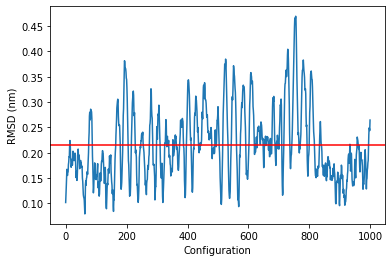

In [3]:
# Compute the mean structure and RMSFs
mean_conf = mean(traj_info, top_info, ncpus=4)
RMSDs, RMSFs = deviations(traj_info, top_info, mean_conf, ncpus=4)
outfile = os.path.join(mydir, "sim_out/devs.json")
rmsd_plot_name = os.path.join(mydir, "sim_out/rmsd.png")
rmsd_data_file = os.path.join(mydir, "sim_out/rmsd_op.json")
output(RMSDs, RMSFs, outfile, rmsd_plot_name, rmsd_data_file)

#They come out as numpy arrays, need to be a dict with a list for visualization
RMSFs = {"RMSF": RMSFs.tolist()}

In [ ]:
# Display python objects in an oxview iframe
oxdna_conf(top_info, mean_conf, RMSFs)

## Bond Analysis

Could not get this to work - having trouble with seg fault.

In [5]:
!pwd
!oat generate_force -o ./forces.txt -f ./pairs.txt input_sim conf.dat

/home/emma/repos/gnn-dna-sim/src/dataset-generation/dsDNA
INFO: The generator will try to take into account bonded interactions by choosing distances between bonded neighbours no larger than 2.000000
INFO: Converting temperature from Kelvin (300.000000 K) to simulation units (0.100000)
INFO: Using a maximum backbone force of 10  (the corresponding mbf_xmax is 0.169258) and a far value of 1
INFO: Running Debye-Huckel at salt concentration =  0.5
INFO: Using different widths for major and minor grooves
INFO: No order parameters file specified in input file; printing indices of any particle pairs that have a hydrogen bond between them
DEBUG: Debye-Huckel parameters: Q=0.054300, lambda_0=0.361646, lambda=0.511444, r_high=1.534332, cutoff=3.264295
DEBUG: Debye-Huckel parameters: debye_huckel_RC=2.301498e+00, debye_huckel_B=2.993770e-03
INFO: The Debye length at this temperature and salt concentration is 0.511444
INFO: (Cells.cpp) N_cells_side: 5, 5, 5; rcut=3.2643, IS_MC: 0
INFO: N: 40, N m

In [7]:
bond_analysis(traj_info, top_info, inputfile=input_file, ncpus=4)

TypeError: bond_analysis() missing 1 required positional argument: 'pairs'